# Notebook completa de entrenamiento de modelos para California Housing

# Leer datos

Lee el archivo con informacion de la encuesta.¿De que forma vas a la escuela?
Hay una fila por cada respuesta.

In [1]:
#problema: https://www.kaggle.com/datasets/camnugent/california-housing-prices
import pandas as pd
housing = pd.read_csv("https://raw.githubusercontent.com/ageron/handson-ml/master/datasets/housing/housing.csv")
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


# Estadistica Descriptiva

Calcule las propiedades estadísticas de los atributos del conjunto de datos.

In [2]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [3]:
housing['ocean_proximity'].value_counts()

ocean_proximity
<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: count, dtype: int64

In [4]:
housing.describe(include="all")

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,<1H OCEAN
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9136
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909,NaN
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874,NaN
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000,NaN
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000,NaN
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000,NaN
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000,NaN


array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

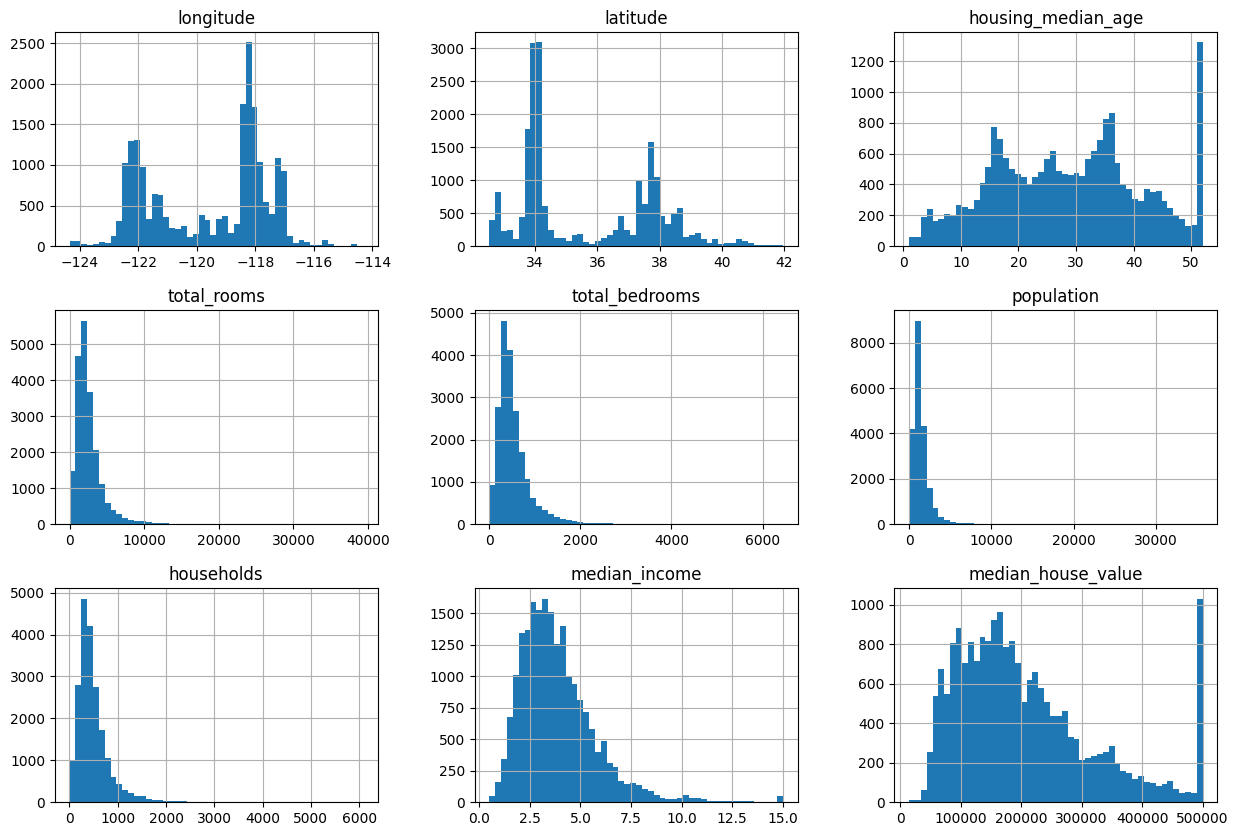

In [5]:
from matplotlib import pyplot as plt
%matplotlib inline

housing.hist(bins = 50, figsize = (15, 10))

In [6]:

housing.drop('ocean_proximity', axis=1).corr()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.924664,-0.108197,0.044568,0.069608,0.099773,0.055310,-0.015176,-0.045967
latitude,-0.924664,1.000000,0.011173,-0.036100,-0.066983,-0.108785,-0.071035,-0.079809,-0.144160
housing_median_age,-0.108197,0.011173,1.000000,-0.361262,-0.320451,-0.296244,-0.302916,-0.119034,0.105623
total_rooms,0.044568,-0.036100,-0.361262,1.000000,0.930380,0.857126,0.918484,0.198050,0.134153
total_bedrooms,0.069608,-0.066983,-0.320451,0.930380,1.000000,0.877747,0.979728,-0.007723,0.049686
population,0.099773,-0.108785,-0.296244,0.857126,0.877747,1.000000,0.907222,0.004834,-0.024650
households,0.055310,-0.071035,-0.302916,0.918484,0.979728,0.907222,1.000000,0.013033,0.065843
median_income,-0.015176,-0.079809,-0.119034,0.198050,-0.007723,0.004834,0.013033,1.000000,0.688075
median_house_value,-0.045967,-0.144160,0.105623,0.134153,0.049686,-0.024650,0.065843,0.688075,1.000000


# Partir Datos

Crea dos particiones separadas del conjunto de datos original: conjunto de entrenamiento (80%) y conjunto de prueba (20%).

In [7]:
income_cat = pd.cut(housing["median_income"], bins=[0, 1.5, 3, 4.5, 6, 16], labels=[1, 2, 3, 4, 5])
income_cat.head()

import sklearn
from sklearn.model_selection import StratifiedShuffleSplit


split_object = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
gen_obj = split_object.split(housing, income_cat)
train_ind, test_ind = next(gen_obj)
strat_train_set = housing.loc[train_ind]
strat_test_set = housing.loc[test_ind]



# Tabla interactiva - (Analisis de datos de entrenamiento para el modelo)

In [8]:
train_copy = strat_train_set.copy()

<Axes: xlabel='latitude', ylabel='longitude'>

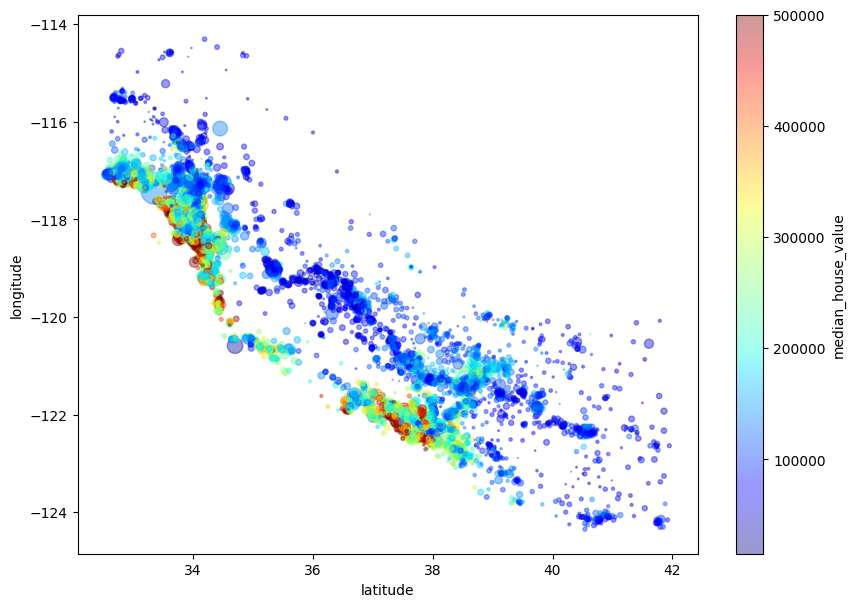

In [9]:
# Genera un gráfico de dispersión para visualizar la distribución geográfica de los datos

train_copy.plot(kind="scatter",          # Tipo de gráfico: dispersión
                x="latitude",            # Variable en el eje x: latitud
                y="longitude",           # Variable en el eje y: longitud
                alpha=0.4,               # Transparencia de los puntos
                s=train_copy["population"]/100,  # Tamaño de los puntos basado en la población
                c="median_house_value",  # Color de los puntos basado en el valor medio de la vivienda
                cmap=plt.get_cmap("jet"),# Mapa de colores utilizado (jet)
                colorbar=True,           # Mostrar barra de colores
                figsize=(10,7)           # Tamaño de la figura (10 pulgadas de ancho, 7 pulgadas de alto)
               )


array([[<Axes: xlabel='median_house_value', ylabel='median_house_value'>,
        <Axes: xlabel='median_income', ylabel='median_house_value'>,
        <Axes: xlabel='latitude', ylabel='median_house_value'>,
        <Axes: xlabel='total_rooms', ylabel='median_house_value'>,
        <Axes: xlabel='housing_median_age', ylabel='median_house_value'>],
       [<Axes: xlabel='median_house_value', ylabel='median_income'>,
        <Axes: xlabel='median_income', ylabel='median_income'>,
        <Axes: xlabel='latitude', ylabel='median_income'>,
        <Axes: xlabel='total_rooms', ylabel='median_income'>,
        <Axes: xlabel='housing_median_age', ylabel='median_income'>],
       [<Axes: xlabel='median_house_value', ylabel='latitude'>,
        <Axes: xlabel='median_income', ylabel='latitude'>,
        <Axes: xlabel='latitude', ylabel='latitude'>,
        <Axes: xlabel='total_rooms', ylabel='latitude'>,
        <Axes: xlabel='housing_median_age', ylabel='latitude'>],
       [<Axes: xlabel='media

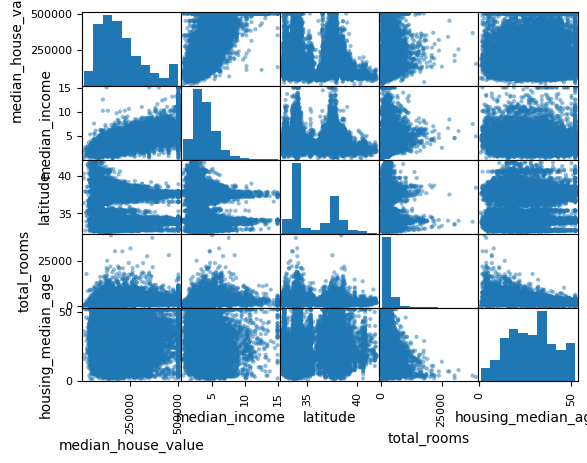

In [10]:
# Genera una matriz de gráficos de dispersión para explorar las relaciones entre múltiples variables

pd.plotting.scatter_matrix(strat_train_set[["median_house_value", "median_income", "latitude", "total_rooms", "housing_median_age"]])


array([[<Axes: xlabel='median_house_value', ylabel='median_house_value'>,
        <Axes: xlabel='median_income', ylabel='median_house_value'>],
       [<Axes: xlabel='median_house_value', ylabel='median_income'>,
        <Axes: xlabel='median_income', ylabel='median_income'>]],
      dtype=object)

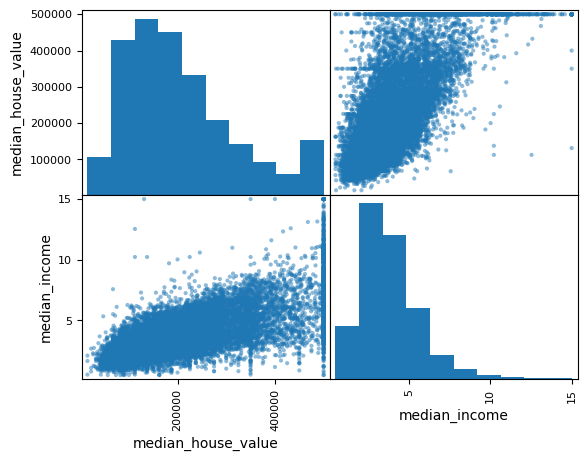

In [11]:
# Genera una matriz de gráficos de dispersión para explorar la relación entre 'median_house_value' y 'median_income'

pd.plotting.scatter_matrix(strat_train_set[["median_house_value", "median_income"]])


# Transformaciones de los atributos (preprocesamiento)

# Preprocesamiento para crear features nuevas

In [16]:
# Crea un conjunto de datos de entrenamiento eliminando la columna 'median_house_value'

train_data = strat_train_set.drop("median_house_value", axis=1)


In [17]:
# Crea una copia de la columna 'median_house_value' del conjunto de entrenamiento como etiquetas

housing_labels = strat_train_set['median_house_value'].copy()


In [18]:
# Crear nuevas variables combinando información en el conjunto de entrenamiento 'train_copy'

# Variable que representa el número promedio de habitaciones por hogar
train_copy["rooms_per_household"] = train_copy["total_rooms"] / train_copy["households"]

# Variable que representa el porcentaje de dormitorios en relación al número total de habitaciones
train_copy["bedrooms_per_room"] = train_copy["total_bedrooms"] / train_copy["total_rooms"]

# Variable que representa la relación entre la población y el valor medio de la vivienda por hogar
train_copy["population_per_household"] = train_copy["population"] / train_copy["median_house_value"]


In [19]:
# Crea un conjunto de datos de entrenamiento eliminando la columna 'median_house_value'

train_data = strat_train_set.drop("median_house_value", axis=1)


In [20]:
# Crea una copia de la columna 'median_house_value' del conjunto de entrenamiento como etiquetas

housing_labels = strat_train_set['median_house_value'].copy()


In [21]:
from sklearn.impute import SimpleImputer

# Crea un objeto SimpleImputer con estrategia de imputación mediana
imputer = SimpleImputer(strategy="median")

# Elimina la columna 'ocean_proximity' del conjunto de datos de entrenamiento 'train_data' para trabajar solo con datos numéricos
housing_num = train_data.drop("ocean_proximity", axis=1)

# Ajusta el imputer utilizando los datos de entrenamiento 'housing_num' (calcula la mediana en este caso por cada columna)
imputer.fit(housing_num)

# Transforma los datos numéricos 'housing_num' imputando los valores nulos con la mediana
out = imputer.transform(housing_num)

# Crea un nuevo DataFrame 'housing_tr' con los datos transformados y las columnas originales de 'housing_num'
housing_tr = pd.DataFrame(out, columns=housing_num.columns)


In [22]:
# Combinar atributos - armando pipelines y transformadores manuales
from sklearn.base import BaseEstimator, TransformerMixin
import numpy as np

# Definir la clase del transformador personalizado para crear columnas nuevas
class CombinedAttributesAdder(BaseEstimator, TransformerMixin):  
    def __init__(self, add_bedrooms_per_room=True):
        self.add_bedrooms_per_room = add_bedrooms_per_room
    
    def fit(self, X, y=None):
        return self
    
    def transform(self, X, y=None):
        rooms_per_household = X[:, 3] / X[:, 6]  # Calcula 'rooms_per_household'
        population_per_household = X[:, 5] / X[:, 6]  # Calcula 'population_per_household'
        
        if self.add_bedrooms_per_room:
            bedrooms_per_room = X[:, 4] / X[:, 3]  # Calcula 'bedrooms_per_room'
            X_transformed = np.c_[X, rooms_per_household, population_per_household, bedrooms_per_room]
        else:
            X_transformed = np.c_[X, rooms_per_household, population_per_household]
        
        return X_transformed

# Ejemplo de uso del transformador personalizado
attr_adder = CombinedAttributesAdder(add_bedrooms_per_room=False)
housing_extra_attribs = attr_adder.transform(train_data.values)

# Importar la clase StandardScaler desde sklearn.preprocessing (escalado por estandarizacion de los datos)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_features = scaler.fit_transform(housing_num)

# Encadenar transformadores (hacer un pipeline)
from sklearn.pipeline import Pipeline
num_pipeline = Pipeline([
          ('imputer',SimpleImputer(strategy="median")), # completa los valores nulos
          ('attribs_adder',CombinedAttributesAdder()), # agrega columnas nuevas
            ("std_scaler", StandardScaler()) # escala los valores por estandarizacion
                ])
housing_num_tr = num_pipeline.fit_transform(housing_num)

# Como Componer las salidas de todas las transformaciones

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

# Definir el pipeline completo utilizando ColumnTransformer
full_pipeline = ColumnTransformer([
    ("num", num_pipeline, list(housing_num)),  # Pipeline numérico definido anteriormente
    ("cat", OneHotEncoder(), ["ocean_proximity"])  # Transformador OneHotEncoder para la columna categórica
])

# Aplicar el pipeline completo a los datos de entrenamiento 'train_data'
housing_prepared = full_pipeline.fit_transform(train_data)

# Entrenar el modelo 

Este nodo crea un modelo que predice el resultado, en este caso un random forest. Otros nodos de aprendizaje entrenan a otros modelos.

In [23]:
# Importar la clase RandomForestRegressor desde sklearn.ensemble

# Entrenar un modelo
from sklearn.ensemble import RandomForestRegressor
forest_reg = RandomForestRegressor()
forest_reg.fit(housing_prepared, housing_labels)
predictions = forest_reg.predict(housing_prepared)

# Medir el error utilizando el RMSE con los datos de entrenamiento
from sklearn.metrics import mean_squared_error
forest_rmse = mean_squared_error(housing_labels, predictions, squared=False)
print("RMSE del modelo de Random Forest (datos de entrenamiento):", forest_rmse)

RMSE del modelo de Random Forest (datos de entrenamiento): 18662.32907926411


/home/lucia/.conda/envs/kedro/lib/python3.11/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


# Evaluar el modelo en el conjunto de prueba

Calcule una matriz de confusión entre los valores de clase reales y los predichos y calcula las medidas de precisión relacionadas.

In [24]:

# Obtener X_test y y_test del conjunto de prueba
X_test = strat_test_set.drop("median_house_value", axis=1)
y_test = strat_test_set["median_house_value"].copy()

# Aplicar la transformación completa a X_test
X_test_prepared = full_pipeline.transform(X_test)

final_model = forest_reg

# Realizar predicciones sobre X_test_prepared utilizando el modelo final
final_predictions = final_model.predict(X_test_prepared)

# Calcular el RMSE entre las etiquetas reales (y_test) y las predicciones finales
final_rmse = mean_squared_error(y_test, final_predictions, squared=False)

print("RMSE final en el conjunto de prueba:", final_rmse)


RMSE final en el conjunto de prueba: 48030.26913105475


/home/lucia/.conda/envs/kedro/lib/python3.11/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


# Como predigo un dato nuevo

In [25]:
from joblib import dump

# Suponiendo que 'final_model' es el mejor modelo entrenado
dump(final_model, 'modelo_random_forest.joblib')

['modelo_random_forest.joblib']

In [26]:
from joblib import load
import pandas as pd
import numpy as np

# Cargar el modelo desde el archivo guardado
loaded_model = load('modelo_random_forest.joblib')

# Definir X_new con los datos para predecir
X_new = [-122.23, 37.88, 41.0, 880.0, 129.0, 322.0, 126.0, 8.3252, "NEAR BAY"]

# Convertir X_new a un DataFrame con las columnas correspondientes
columns = ['longitude', 'latitude', 'housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households', 'median_income', 'ocean_proximity']
X_new_df = pd.DataFrame([X_new], columns=columns)

# Aplicar la transformación completa a X_new_df
X_new_prepared = full_pipeline.transform(X_new_df)

# Hacer predicciones con el modelo cargado
predictions = loaded_model.predict(X_new_prepared)

print("Predicción:", predictions[0])

Predicción: 435486.01
